# Web Scraping and Data Preprocessing

We'll be scraping weather data from https://williamprofit.github.io/ICDSS-Lecture-Webscraping/

Hopefully by the end we'll get a useful model to predict temperatures from multiple features.

We'll proceed as follows:
- Scrape website to create a dataset
- Visualise the data
- Preprocess the data and create a model

## 1. Web Scraping

In order to web scrape, we start by importing all necessary libraries and setting some useful constant values.

In [ ]:
from bs4 import BeautifulSoup # Used to parse HTML files
import pandas as pd           # Used to store data
from requests import get      # Used to request website HTML page

# URL we'll be scraping from
URL = 'https://williamprofit.github.io/ICDSS-Lecture-Webscraping'
# File path to save the data to
FILE = './data.csv'

We create a container to hold our data (empty for now). It contains all the features we'll be extracting and our script will fill it as we go on.

In [ ]:
weather_data = {
    'temp' : [],
    'pressure' : [],
    'wind_speed' : [],
    'dew_point' : [],
    'humidity' : []
}

From the main page, we need to get the URLs of all the sub pages to scrape from. This is done by scraping the page for the links to the subpages and then visiting them in turn.

In [47]:
# Get main page
resp = get(URL)

# Extract text
soup = BeautifulSoup(resp.text, 'html.parser')

# Extract 'href' fields
week_pages = soup.select('li > a')

# Extract link ending from 'href' fields
week_pages = list(map(lambda x: x.get('href'), week_pages))

Now that `week_pages` holds links to all the pages containing the data, we can traverse it and scrape the sub pages.

In [48]:
# Scraping all week pages
for page in week_pages:
    url = URL + '/' + page
    print('Scraping {}'.format(url))
    
    # Take HTML page and parse
    out = get(url)
    soup_p = BeautifulSoup(out.text, 'html.parser')
    
    # Get data from all rows except headings
    rows = soup_p.select('tr')[1:]
    for row in rows:
        vals = row.select('th')
        vals = list(map(lambda v: v.text, vals))[1:]
        
        # Store the data
        weather_data['temp'].append(vals[0])
        weather_data['dew_point'].append(vals[1])
        weather_data['humidity'].append(vals[2])
        weather_data['wind_speed'].append(vals[3])
        weather_data['pressure'].append(vals[4])
    
print('Done.')

Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20000826.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20001028.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20001202.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20011020.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20020518.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20050723.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20060325.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20060415.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20060520.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20060916.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20060930.html
Scraping https://williamprofit.github.io/ICDSS-Lecture

Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150328.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150404.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150411.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150418.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150425.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150502.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150509.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150516.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150523.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150530.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20150606.html
Scraping https://williamprofit.github.io/ICDSS-Lecture

Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170211.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170218.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170225.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170304.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170311.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170318.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170325.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170401.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170408.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170415.html
Scraping https://williamprofit.github.io/ICDSS-Lecture-Webscraping/week/20170422.html
Scraping https://williamprofit.github.io/ICDSS-Lecture

We can now save our data using pandas.

In [49]:
# Save in csv file
print('Saving in {}'.format(FILE))
# Create a pandas dataframe with given feature columns
data = pd.DataFrame(weather_data, columns=['temp', 'pressure', 'wind_speed', 'dew_point', 'humidity'])
# Save data to file at path FILE
data.to_csv(FILE, sep=',')

Saving in ./data.csv


We can now simply load our data from a file instead of web scraping again.

In [50]:
data = pd.read_csv(FILE)
print(data)

      Unnamed: 0       temp   pressure  wind_speed  dew_point   humidity
0              0  66.833333  29.960000    9.166667  54.833333  66.333333
1              1  59.166667  29.635000    9.500000  53.000000  80.500000
2              2  61.333333  29.555000   10.333333  52.000000  71.333333
3              3  63.833333  29.540000   10.500000  52.333333  65.833333
4              4  61.333333  29.525000   11.666667  53.000000  74.000000
5              5  60.666667  29.510000    7.833333  54.333333  79.500000
6              6  57.666667  29.610000    7.333333  54.000000  86.000000
7              7  54.714286  29.564286   13.500000  47.750000  79.571429
8              8  51.642857  28.945000   21.892857  41.857143  70.321429
9              9  51.785714  29.171429   15.250000  41.071429  67.392857
10            10  49.500000  29.341786   14.214286  38.071429  65.035714
11            11  48.428571  29.199286   11.607143  41.000000  76.178571
12            12  47.178571  29.162143    9.607143 

## 2. Visualisation
In order to create a performant model, it's important to visualise the data to get an intuition of how it could be modeled. We typically plot the predicted feature against other features and compute correlation coefficients.

### Plotting graphs
We can start plotting graphs to visualise how the temperature evolves with different metrics. We create a list `days` which simply enumerates the days from 0 to `len(data)` which will be used for the x-axis. This can be achieved using the range function and making it into a list.

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

# Creating x-axis (days)
days = list(range(len(data)))

Let's plot the temperature with pressure. The syntax of the plot function is as follows: `plt.plot(x-axis, y-axis, x-axis, y-axis, ..)`.

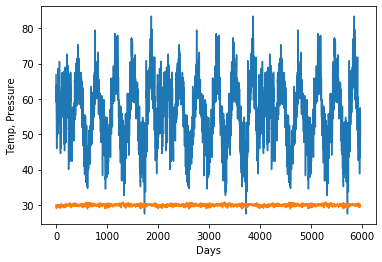

In [56]:
plt.xlabel('Days')
plt.ylabel('Temp, Pressure')
plt.plot(days, data['temp'], days, data['pressure'])

We continue with temperature and wind speed:

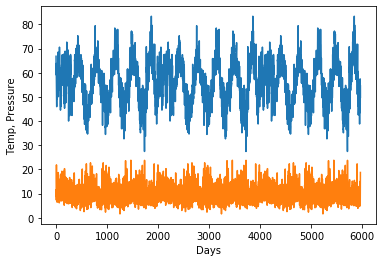

In [57]:
plt.xlabel('Days')
plt.ylabel('Temp, Wind Speed')
plt.plot(days, data['temp'], days, data['wind_speed'])

Now temperature and dew point:

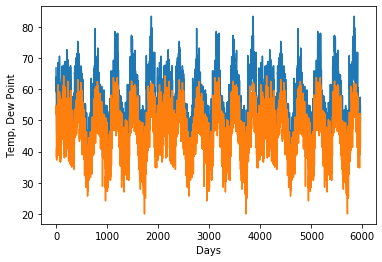

In [58]:
plt.xlabel('Days')
plt.ylabel('Temp, Dew Point')
plt.plot(days, data['temp'], days, data['dew_point'])

And finally temperature and humidity:

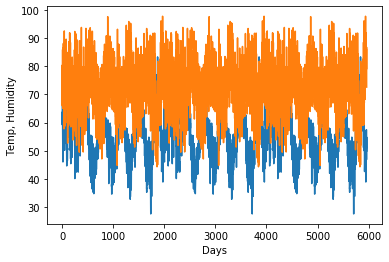

In [59]:
plt.xlabel('Days')
plt.ylabel('Temp, Humidity')
plt.plot(days, data['temp'], days, data['humidity'])

The graphs can now be used to visually get an intuition of how each feature relates to the one we're trying to predict.

### Computing correlation coefficients
Graphs are useful but sometimes they can be difficult to interpret and having a standard way of determining how correlated two features are can come in quite handy. For several metrics can help, we'll be looking at the covariance. Numpy has a handy `cov` function that we'll be using. The function returns 4 values in a 2D array but we're only interested in the value at `[0][1]`.

In [63]:
from numpy import cov

pressure_cov = cov(data['temp'],data['pressure'])[0][1]
wind_cov = cov(data['temp'], data['wind_speed'])[0][1]
dew_cov = cov(data['temp'], data['dew_point'])[0][1]
humidity_cov = cov(data['temp'], data['humidity'])[0][1]

print('temp vs pressure: cov={}'.format(pressure_cov))
print('temp vs wind_speed: cov={}'.format(wind_cov))
print('temp vs dew_point: cov={}'.format(dew_cov))
print('temp vs humidity: cov={}'.format(humidity_cov))

temp vs pressure: cov=0.06872303554264414
temp vs wind_speed: cov=-1.450920737910287
temp vs dew_point: cov=66.84761822406303
temp vs humidity: cov=-36.67691213138593


This gives us a better idea of correlations between our features. The higher the covariance factor the higher the correlation. If the covariance is negative then the two features are inversely correlated. We can use all this information to decide which features to select for our model.

## 3. Preprocessing and Modelling

Our data is well balanced and is not categorical so there is no need to balance, augment or one-hot-encode it. We'll only be normalising it to have it in a range of `0-1`. For that we'll use the following formula $X_{normalised}=\frac{X-min(X)}{max(X)-min(X)}$:

In [67]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Normalise data (min-max normalisation)
data = (data - data.min())/(data.max() - data.min())

We now split our data into two vectors `X` and `y`. `y` contains the column we want to predict, namely the temperature. `X` contains all the columns (features) we'll use to predict the temperature. 

In [70]:
# Features used for predictions
feat = ['humidity', 'pressure', 'dew_point']

X = data[feat].to_numpy()
y = data['temp'].to_numpy()

To better evaluate our model we separate the data into a training and a testing set. The training set is fed to the model to train and the test set contains data the model has not trained on so we can compute accuracy on unseen data. To achieve this, scikit has the `train_test_split` functions which splits and shuffles the data into 4 partitions for X/y and train/test.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.75,
    test_size = 0.25,
    random_state = 0,
)

We finally create a linear regression model using the training set and gauge the accuracy on the test set:

In [72]:
reg = LinearRegression()

reg.fit(X = X_train, y = y_train)

reg.score(X = X_test, y = y_test)

0.9967263659588955

And that's it! We now have a handy model to predict temperatures.

_William Profit (williamprofit.com) on behalf of ICDSS (icdss.uk)_